# Linear Regression


In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2.  線性迴歸訓練資料、測試資料

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數
之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [61]:
x=np.linspace(0,5,50)
y=1.2*x+0.8+0.6*np.random.randn(50)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train

array([2.34693878, 4.18367347, 1.32653061, 3.16326531, 3.57142857,
       0.20408163, 2.95918367, 1.12244898, 4.48979592, 3.36734694,
       4.69387755, 4.89795918, 4.79591837, 2.75510204, 0.6122449 ,
       0.71428571, 4.08163265, 3.7755102 , 4.28571429, 4.59183673,
       1.93877551, 1.73469388, 0.10204082, 2.14285714, 3.87755102,
       0.30612245, 2.55102041, 3.67346939, 3.26530612, 0.        ,
       1.83673469, 0.51020408, 2.04081633, 4.3877551 , 1.02040816,
       2.85714286, 2.24489796, 1.42857143, 0.40816327, 5.        ])

In [62]:
y

array([0.09629875, 0.99967457, 0.59523745, 1.10974184, 2.46221203,
       1.38687018, 1.61062463, 1.76306692, 1.99144612, 1.17716989,
       1.77907865, 2.07628762, 2.66237642, 3.21287788, 2.17993391,
       1.89285006, 2.8898586 , 2.88629859, 3.32621996, 2.97550979,
       3.06116465, 3.50977198, 3.93603681, 4.71124253, 3.93697497,
       3.20076684, 3.88993926, 4.24606716, 3.95732392, 4.86440871,
       4.21606044, 5.24274041, 4.23726459, 4.66570889, 4.80875296,
       5.19823381, 5.15461271, 5.08268331, 6.06439806, 6.17695936,
       6.53652552, 6.43083724, 6.24211147, 5.54925229, 6.25325932,
       6.55484008, 5.95072365, 7.72503787, 6.80389322, 6.18454594])

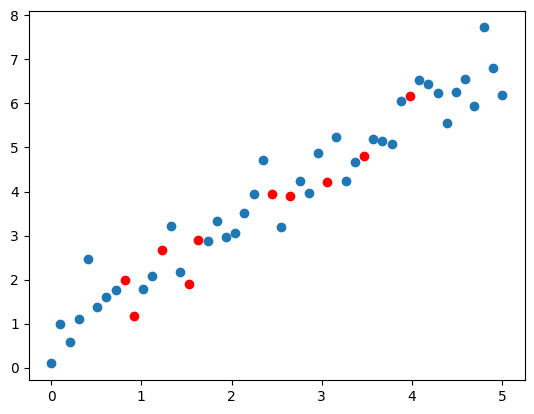

In [63]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,c='r')

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [64]:
regr=LinearRegression()
X_train=x_train.reshape(-1,1)
regr.fit(X_train,y_train)
print('Coefficients: ', regr.coef_)
print('interception: ', regr.intercept_)

Coefficients:  [1.22855066]
interception:  0.8239180978953362


In [65]:
Y_train=regr.predict(X_train)

In [66]:
mse=sum((Y_train-y_train)**2)/len(Y_train)
mse

0.23703925294318604

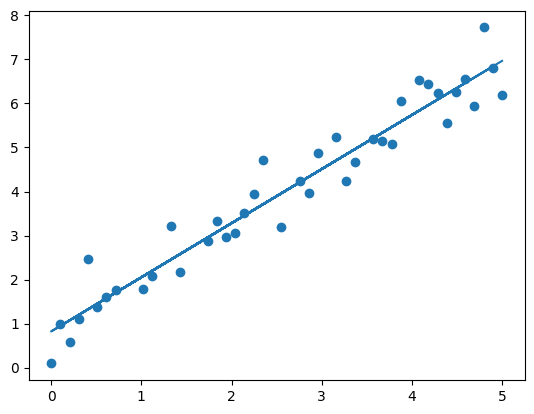

In [67]:
plt.scatter(x_train,y_train)
plt.plot(X_train,Y_train)

#### test with test data

In [68]:
X_test=x_test.reshape(-1,1)
Y_test=regr.predict(X_test)
Y_test

array([5.08623671, 4.58478746, 2.70435278, 2.32826584, 1.95217891,
       2.82971509, 5.71304827, 4.08333821, 1.82681659, 3.83261359])

$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [69]:
#Y=WX+b
'''
w=regr.coef_
b=regr.intercept_
Y_test=w*X_test+b
Y_test
'''

'\nw=regr.coef_\nb=regr.intercept_\nY_test=w*X_test+b\nY_test\n'

In [70]:
mse=np.sum((Y_test-y_test)**2)/len(Y_test)
mse

0.18779904319232188

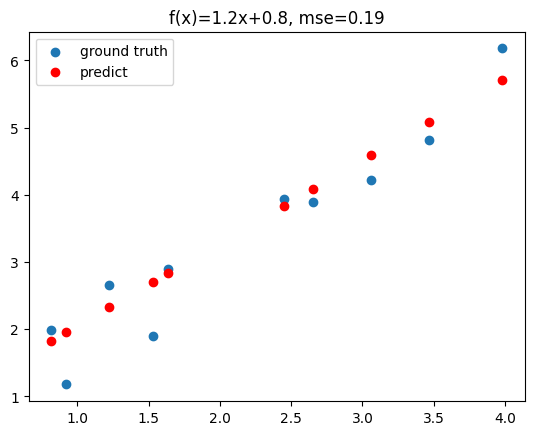

In [71]:
plt.scatter(x_test,y_test,label='ground truth')
plt.scatter(x_test,Y_test,c='r',label='predict')
title=f'f(x)=1.2x+0.8, mse={round(mse,2)}'
plt.title(title)
plt.legend()